In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# Load the 14C data
# TODO: save a sorted version with years before present and column names
C14_DATA = pd.read_csv('../data/14C_atm.csv')
C14_DATA.columns = ['year', 'Delta_14C']
C14_DATA = C14_DATA.dropna().sort_values('year', ascending=True)
C14_DATA['years_before_present'] = (C14_DATA.year - C14_DATA.year.max()).abs()
C14_DATA['years_before_2000'] = (2000 - C14_DATA.year)
C14_DATA['R_14C'] = C14_DATA.Delta_14C / 1000 + 1
C14_DATA = C14_DATA.sort_values('year', ascending=False)
C14_DATA.to_csv('../data/14C_atm_annot.csv', index=False)

In [3]:
INTERP_R_14C = interp1d(C14_DATA.years_before_2000, C14_DATA.R_14C,
                        kind='zero', fill_value='extrapolate')

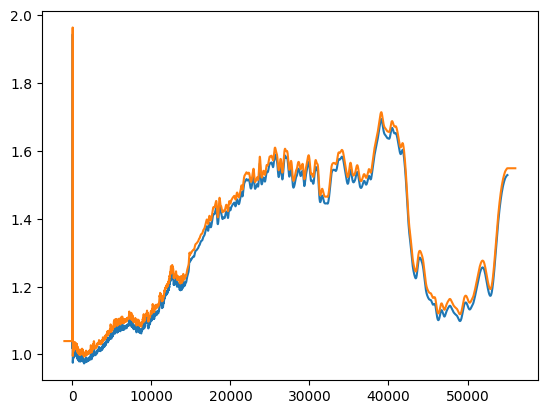

In [4]:
plt.plot(C14_DATA.years_before_2000, C14_DATA.R_14C)
x_min, x_max = C14_DATA.years_before_2000.min(), C14_DATA.years_before_2000.max()
xs = np.arange(x_min-1000, x_max+1000, 1)
plt.plot(xs, INTERP_R_14C(xs) + 0.02)
#plt.xlim(-100, 30)
plt.show()
